# **Deep Learning Project: Street View Housing Number Digit Recognition**

# **Marks: 60**

--------------
## **Context** 
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents. 

----------------
## **Objective**
----------------

Our objective is to predict the number depicted inside the image by using Artificial or Fully Connected Feed Forward Neural Networks and Convolutional Neural Networks. We will go through various models of each and finally select the one that is giving us the best performance. 

-------------
## **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been applied on the dataset.

## **Mount the drive**

Let us start by mounting the Google drive. You can run the below cell to mount the Google drive.

In [ ]:
# I am running locally therefore there is no need to mount to Google Drive.
# from google.colab import drive
# drive.mount('/content/drive')

## **Importing the necessary libraries**

In [23]:
%pip install --upgrade pip
%pip install numpy
%pip install -U matplotlib
%pip install torch torchvision torchaudio
%pip install -U scikit-learn
%pip install h5py

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB

**Let us check the version of PyTorch.**

In [94]:
import torch
print(torch.__version__)

2.4.0


## **Load the dataset**

- Let us now load the dataset that is available as a .h5 file.
- Split the data into the train and the test dataset.

In [95]:
import h5py

In [96]:
# First we will import the required libraries
import scipy 
import numpy as np

Check the number of images in the training and the testing dataset.

In [97]:
hf = h5py.File('SVHN_single_grey1.h5', 'r')

In [98]:
list(hf.keys())

['X_test', 'X_train', 'X_val', 'y_test', 'y_train', 'y_val']

In [99]:
# First, lets determine the total number of X and Y files in our dataset.
total_x = sum([hf[y].shape[0] for y in list(hf.keys()) if y[0] == "X"])
total_y = sum([hf[y].shape[0] for y in list(hf.keys()) if y[0] == "y"])
print(f"{total_x} x and {total_y} y\n")

for keys in list(hf.keys()):
    if keys[0] == "X":
        print(f"{hf[keys].shape[0]} files in {keys}, {hf[keys].shape[0]/total_x}% of total data")
    else:
        print(f"{hf[keys].shape[0]} files in {keys}, {hf[keys].shape[0]/total_y}% of total data")

120000 x and 120000 y

18000 files in X_test, 0.15% of total data
42000 files in X_train, 0.35% of total data
60000 files in X_val, 0.5% of total data
18000 files in y_test, 0.15% of total data
42000 files in y_train, 0.35% of total data
60000 files in y_val, 0.5% of total data


In [100]:
# To convert from .h5 to the Numpy array
hf = h5py.File('SVHN_single_grey1.h5', 'r')
n1 = hf.get('X_test')
n2 = np.array(n1)

n2.shape

(18000, 32, 32)

**Observation:**

Here, we have an equally distributed dataset with a .15/.35/.5 split for the Test, Train and Validation files accordingly.  From my experience, it is industry standard to utilize a .1/.1/.8 split, which is something I might evaluate further to improve the model's accuracy.  

## **Visualizing images**

- Use X_train to visualize the first 10 images.
- Use Y_train to print the first 10 labels.

In [101]:
# Add an alias to make the code easier to understand
x_train = np.array(hf['X_train'])
y_train = np.array(hf['y_train'])

In [107]:
# First let's take a look at the dataset image shape
print(x_train[0].shape)
print(y_train.shape)
print(y_train[0])

(32, 32)
(42000,)
2


In [72]:
# Now let's try to determine what the color format we are dealing with
x_train[0][0][0]

np.float32(33.0704)

In [73]:
np.max(x_train), np.min(x_train)

(np.float32(254.9745), np.float32(0.0))

In [129]:
# This is a grayscale image, where the color ranges from 0-255 (Black to White)
# Because we are working with a grayscale image, we can utilize PIL Images
import matplotlib.pyplot as plt

In [76]:
x_train[0].shape

(32, 32)

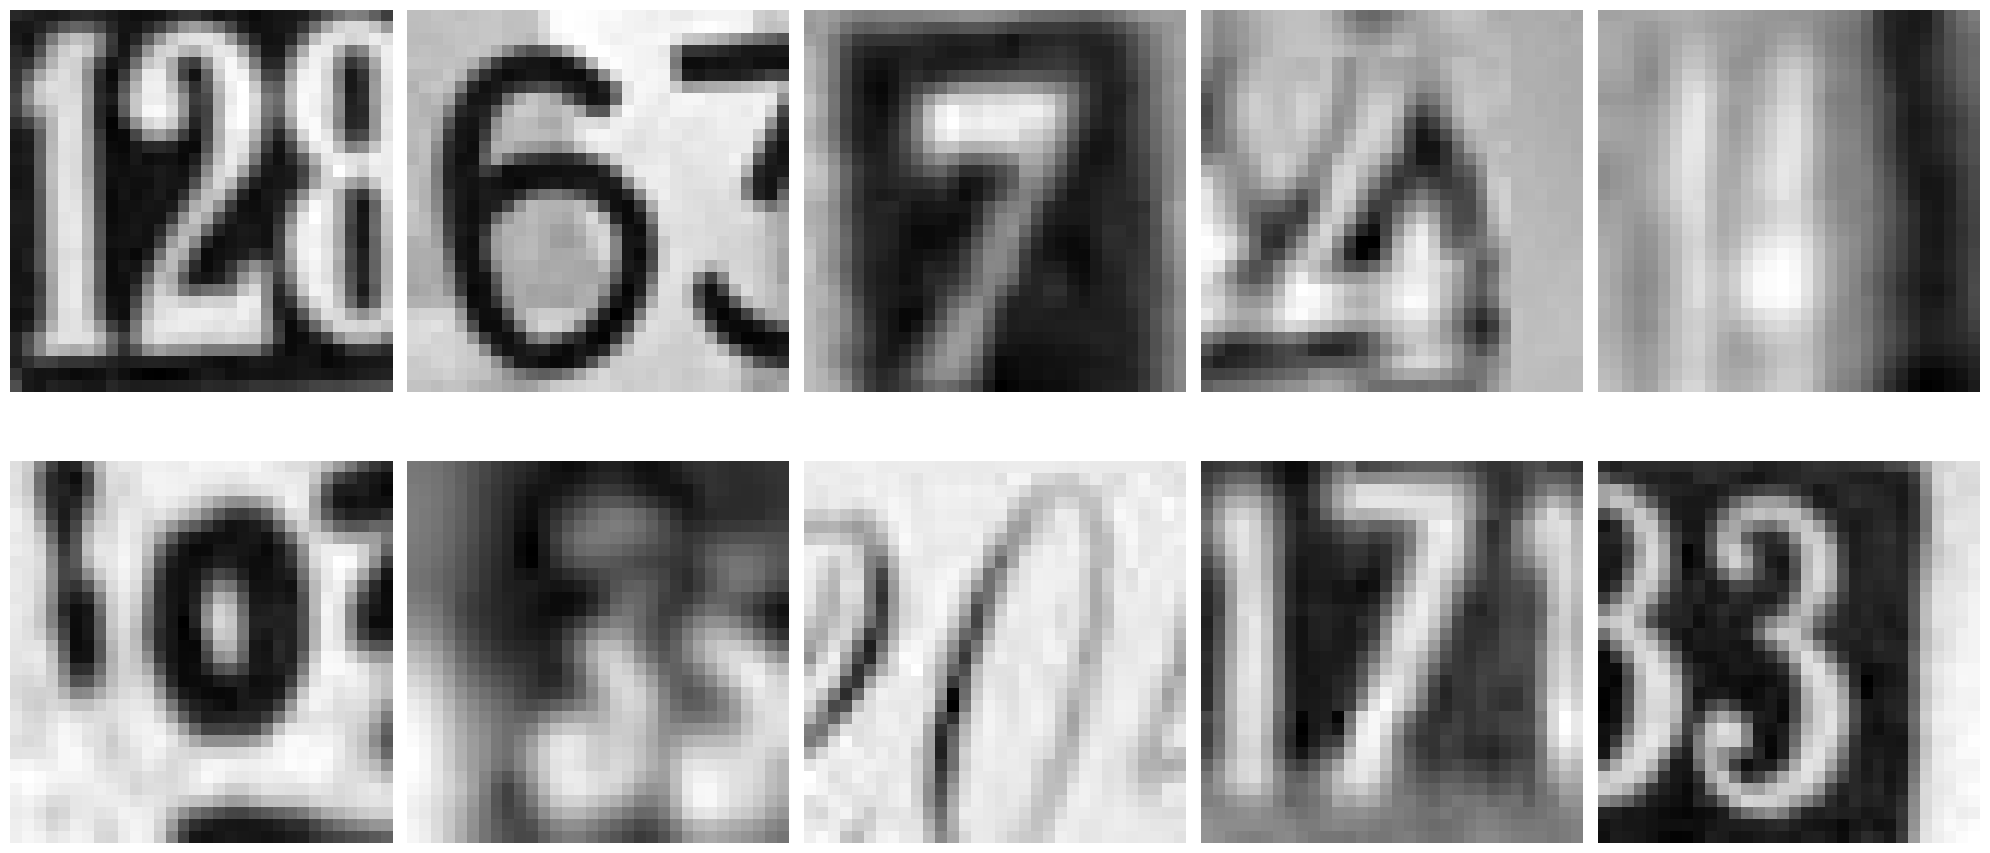

In [88]:
num_images = 10
fig, axes = plt.subplots(2, 5, figsize=(20, 10))

for i, ax in enumerate(axes.flat):
    if i < num_images:
        ax.imshow(x_train[i], cmap='gray')
    ax.axis('off')

plt.tight_layout()
plt.show()

In [128]:
for i, ax in enumerate(axes.flat):
    if i < num_images and (i + 1) % axes.shape[1] == 0:
        print((y_train[i]))
    else:
        print((y_train[i]), end=" ")

2 6 7 4 4
0 3 0 7 3


## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [130]:
print(f"The shape of the images is {x_train[0].shape}")
print(x_train[0])

The shape of the images is (32, 32)
[[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [131]:
x_train / 255

array([[[0.12968785, 0.11866706, 0.10530196, ..., 0.2801847 ,
         0.2283153 , 0.16860352],
        [0.09893451, 0.10020902, 0.1175549 , ..., 0.4432192 ,
         0.40534863, 0.33056822],
        [0.10304902, 0.08868118, 0.15873058, ..., 0.44432473,
         0.47754902, 0.45263842],
        ...,
        [0.11196157, 0.14200786, 0.17678471, ..., 0.09465059,
         0.09840274, 0.10219726],
        [0.15072627, 0.10381687, 0.09126157, ..., 0.11023294,
         0.11556196, 0.11790627],
        [0.19724864, 0.10226392, 0.0942702 , ..., 0.19477727,
         0.19942354, 0.20799099]],

       [[0.34101608, 0.3414451 , 0.34656274, ..., 0.3600055 ,
         0.35195178, 0.3628635 ],
        [0.33995295, 0.340829  , 0.34287727, ..., 0.35580626,
         0.3419765 , 0.34730548],
        [0.33711922, 0.33652744, 0.33695647, ..., 0.25044155,
         0.23458785, 0.21521765],
        ...,
        [0.35381806, 0.35703844, 0.3665243 , ..., 0.21707255,
         0.19051842, 0.17276745],
        [0.3

### **Normalize the train and the test data**

Print the shapes of Training and Test data

In [132]:
x_train.shape

(42000, 32, 32)

In [133]:
y_train.shape

(42000,)

### **One-hot encode output**

In [137]:
# Hot encoding is the act of assigning binary classification for the type of value we have

**Observation:**


## **Model Building**

Now that we have done the data preprocessing, let's build an ANN model.

### Fix the seed for random number generators

In [136]:
seed = 42

### **Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **64 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **32 nodes and the relu activation**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_1 function and store the model in a new variable. 
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train an ANN model as per the above mentioned architecture.**

### **Plot the Training and Validation Accuracies and write down your Observations.**

**Observations:_______**

Let's build one more model with higher complexity and see if we can improve the performance of the model. 

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

### **Second Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **256 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **128 nodes and the relu activation**
 - Add the **Dropout layer with the rate equal to 0.2**
 - Third hidden layer with **64 nodes and the relu activation**
 - Fourth hidden layer with **64 nodes and the relu activation**
 - Fifth hidden layer with **32 nodes and the relu activation**
 - Add the **BatchNormalization layer**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 -Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.0005), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_2 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the new ANN model as per the above mentioned architecture**

### **Plot the Training and Validation Accuracies and write down your Observations.**

**Observations:_______**

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

### **Print the classification report and the confusion matrix for the test predictions. Write your observations on the final results.**

**Final Observations:__________**

## **Using Convolutional Neural Networks**

### **Load the dataset again and split the data into the train and the test dataset.**

Check the number of images in the training and the testing dataset.

**Observation:**


## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Reshape the train and the test dataset because we always have to give a 4D array as input to CNNs.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

Reshape the dataset to be able to pass them to CNNs. Remember that we always have to give a 4D array as input to CNNs

Normalize inputs from 0-255 to 0-1

Print New shape of Training and Test

### **One-hot encode the labels in the target variable y_train and y_test.**

**Observation:**


## **Model Building**

Now that we have done data preprocessing, let's build a CNN model.
Fix the seed for random number generators

### **Model Architecture**
- **Write a function** that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Another **LeakyRelu** with the **slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_1 and store the output in a new variable.
- Print the summary of the model.
- Fit the model on the training data with a **validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train a CNN model as per the above mentioned architecture.**

### **Plot the Training and Validation Accuracies and Write your observations.**

**Observations:__________**

Let's build another model and see if we can get a better model with generalized performance.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

### **Second Model Architecture**

- Write a function that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add **LeakyRelu** with the **slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - Third Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Fourth Convolutional layer **64 filters and the kernel size of 3x3 with 'same' padding** 
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **dropout layer with the rate equal to 0.5**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_2 and store the model in a new variable.
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the second CNN model as per the above mentioned architecture.**

### **Plot the Training and Validation accuracies and write your observations.**

**Observations:________**

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

### **Make predictions on the test data using the second model.** 

**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector, but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

### **Write your final observations on the performance of the model on the test data.**

**Final Observations:_________**